1. Background of Project
2. Hypotheses
3. Summary of Findings and Insights
4. Data Acquisition and Prep
5. Exploratory Data Analysis
6. Feature Engineering
7. Modeling
8. Evaluation

Notes:
- Image use footnote
    - PBS KIDS and the PBS KIDS Logo are registered trademarks of PBS. Used with permission. The contents of PBS KIDS Measure Up! were developed under a grant from the Department of Education. However, those contents do not necessarily represent the policy of the Department of Education, and you should not assume endorsement by the Federal Government. The app is funded by a Ready To Learn grant (PR/AWARD No. U295A150003, CFDA No. 84.295A) provided by the Department of Education to the Corporation for Public Broadcasting.

# Child Learning and Development with PBS KIDS Measure Up! App

![title](mu_image.jpeg)

## I. BACKGROUND

### MEASURE UP! APP  
The PBS KIDS Measure Up! app is designed for children ages 3-5 to develop their comprehension of early STEM concepts. The app takes users on an adventure through three worlds: 
   - **Magma Peak** focuses on capacity and displacement
   - **Crystal Caves** focus is about weight
   - **Treetop City** teaches the concepts of length and height.

### 2019 KAGGLE DATA SCIENCE BOWL COMPETITION PRESENTED BY PBS KIDS & BOOZ ALLEN HAMILTON
This year's competition is focused on early childhood education through multimedia learning. Anonymized Measure Up! gameplay data was provided by PBS KIDS. The end product of each submission is to provide a model that predicts the accuracy group of users.

Accuracy group is based on the number of attempts a user makes until s/he completes the "challenge" (a.k.a. assessment). Based on user's performance on each completed assessment, an accuracy group is assigned:
 - 3 - Successfully completed the assessment on 1 attempt
 - 2 - Completed assessment on 2 attempts
 - 1 - Completed assessment on 3 attempts
 - 0 - Completed assessment on more than 3 attempts

The model will help PBS KIDS to improve game design and to discover relationships on game engagement and learning processes.

### THE PROJECT
The project is inspired by 2019's Kaggle Data Science Bowl. By analyzing data publicly provided by PBS KIDS on Kaggle, our team has sought to identify and understand drivers of children’s success on assessments (a.k.a. "challenges") in the app. The insights inform teachers and parents on how well using the different activities in the application prepare 3-5-year old children for the application’s final assessments.

A presentation documenting our findings and recommendations is delivered on Jan 30, 2020.

### PROBLEM STATEMENTS & HYPOTHESES:

**Problem 1:** What are the drivers of users assessment accuracy?  
**Hypothesis:** Historical Performance and Time drive assessment performance.
  
**Problem 2:** Is there a certain path that better prepare users in assessments - with the two paths being, linear progression and random (choose activities at their own will)  
**Hypothesis:** There is no difference in the performance between users who followed a linear progression and those who had random learning path.

> Linear Progression and their corresponding in-game activities are as follows:  
**Exposure** (video clip) → **Exploration** (activity) → **Practice** (game) → **Demonstration** (assessment)

### SUMMARY OF FINDINGS AND INSIGHTS

### CONCLUSION AND RECOMMENDATION




---

## II. MODULES & LIBRARIES

In [456]:
import pandas as pd
import numpy as np

#viz
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

#modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

---
## III. DATA ACQUISITION & PREP

---
## IV. EXPLORATORY DATA ANALYSIS 

### Feature Selection

In [161]:
big = pd.read_csv("train_maybe_final.csv")

In [192]:
big.installation_id.nunique()

3485

In [162]:
big.head()

,Unnamed: 0,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [163]:
assessment = big[big.type == "Assessment"]

#### MAX CEILING

In [227]:
mc = assessment.groupby(["installation_id","game_session"])[["accuracy"]].max().sort_values(by=["installation_id","accuracy"],ascending=False).reset_index()
mc = mc.drop_duplicates(subset="installation_id",keep="first")

max_ceiling = mc[["installation_id","accuracy"]].set_index("installation_id").rename(columns={"accuracy":"max_ceiling"})

In [228]:
max_ceiling.shape

(2496, 1)

#### LOWEST POSSIBLE SCORE

In [230]:
ls = assessment.groupby(["installation_id","game_session"])[["accuracy"]].min().sort_values(by=["installation_id","accuracy"],ascending=True).reset_index()
ls = ls.drop_duplicates(subset="installation_id",keep="first")

lowest_score = ls[["installation_id","accuracy"]].set_index("installation_id").rename(columns={"accuracy":"low_score"})

In [231]:
lowest_score.shape

(2496, 1)

#### MEDIAN SCORE

In [232]:
md = assessment.groupby(["installation_id","game_session"])[["accuracy"]].median().sort_values(by=["installation_id","accuracy"]).reset_index()
md = md.drop_duplicates(subset="installation_id",keep="first")

median_score = md[["installation_id","accuracy"]].set_index("installation_id").rename(columns={"accuracy":"median_score"})

In [233]:
median_score.shape

(2496, 1)

#### NUMBER OF ACTIONS

In [255]:
actions = assessment.groupby(['installation_id','game_session'])[['event_id']].count().reset_index().groupby("installation_id").sum().reset_index()

actions = actions[["installation_id","event_id"]].set_index("installation_id").rename(columns={"event_id":"no_actions"})

In [257]:
actions.shape

(2496, 1)

#### NUMBER OF INCORRECT

In [267]:
no_incorrect = assessment.groupby(['installation_id','game_session'])[['num_incorrect']].count().reset_index().groupby("installation_id").sum()

In [268]:
no_incorrect.shape

(2496, 1)

#### ACCURACY TENDENCY

In [349]:
tendency = assessment.groupby(['installation_id','game_session',"accuracy"])[['accuracy']].count().rename(columns={"accuracy":"acc"}).sort_values(by=["installation_id","acc"],ascending=False).reset_index()

tendency = tendency.drop_duplicates(subset="installation_id",keep="first")
tendency = tendency[["installation_id","accuracy"]]

In [350]:
condition_list = [tendency.accuracy == 0, tendency.accuracy == 0.5,tendency.accuracy == 1, (~tendency.accuracy.isin([0,1,0.5]))]
choice_list = ["low_scorer","avg_scorer","high_scorer","random_scorer"]

tendency["group"] = np.select(condition_list,choice_list,0)

In [351]:
tendency = pd.get_dummies(tendency,columns=["group"], prefix="tendency")
tendency = tendency[['installation_id','tendency_avg_scorer','tendency_high_scorer', 'tendency_low_scorer','tendency_random_scorer']].set_index("installation_id")

In [355]:
tendency.shape

(2496, 4)

In [353]:
qu = max_ceiling.join([lowest_score,median_score,actions,no_incorrect,tendency])

In [354]:
qu.head()

,max_ceiling,low_score,median_score,no_actions,num_incorrect,tendency_avg_scorer,tendency_high_scorer,tendency_low_scorer,tendency_random_scorer
installation_id,,,,,,,,,
ffeb0b1b,0.333333,0.000000,0.000000,186,186,0,0,1,0
ffc90c32,1.000000,0.333333,0.333333,204,204,0,0,0,1
ff9715db,1.000000,0.000000,0.000000,329,329,0,0,1,0
ff9305d7,0.076923,0.000000,0.000000,330,330,0,0,0,1
ff90db99,1.000000,0.333333,0.333333,273,273,0,0,0,1


In [356]:
qu.to_csv("cris_df.csv")

---
## V. TEST-TRAIN SPLIT & FEATURE ENGINEERING 

Acquire "tidy" data frames with features and y for feature engineering.

In [357]:
# Features on separate data frames
qu = pd.read_csv("cris_df.csv")
be = pd.read_csv("beta.csv")

In [358]:
qu.set_index("installation_id",inplace=True)
be.set_index("installation_id",inplace=True)

In [364]:
print(f"shape:{be.shape}")
be.head()

shape:(3523, 44)


,0.0,1.0,2.0,3.0,Activity,Assessment,Clip,Game,accuracy_group,assesments_CC,...,bird_min,cart_min,cauld_min,chest_min,shroom_min,bird_max,cart_max,cauld_max,chest_max,shroom_max
installation_id,,,,,,,,,,,,,,,,,,,,,
0006a69f,1.0,0.0,1.0,2.0,10.0,4.0,28.0,13.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0
0006c192,1.0,0.0,0.0,1.0,8.0,2.0,30.0,6.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
00129856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001d0ed0,1.0,0.0,1.0,2.0,1.0,4.0,19.0,3.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0,1.0
00225f67,0.0,0.0,0.0,0.0,3.0,0.0,10.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [361]:
print(f"shape:{qu.shape}")
qu.head()

shape:(2496, 9)


,max_ceiling,low_score,median_score,no_actions,num_incorrect,tendency_avg_scorer,tendency_high_scorer,tendency_low_scorer,tendency_random_scorer
installation_id,,,,,,,,,
ffeb0b1b,0.333333,0.000000,0.000000,186,186,0,0,1,0
ffc90c32,1.000000,0.333333,0.333333,204,204,0,0,0,1
ff9715db,1.000000,0.000000,0.000000,329,329,0,0,1,0
ff9305d7,0.076923,0.000000,0.000000,330,330,0,0,0,1
ff90db99,1.000000,0.333333,0.333333,273,273,0,0,0,1


#### SUBSETTING FOR BALANCED DATA

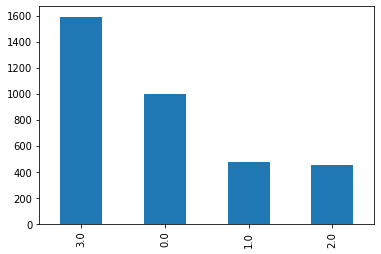

In [536]:
be.accuracy_group.value_counts().plot(kind="bar")

In [544]:
be_0 = be[be.accuracy_group == 0].sample(n=339,random_state=123)
be_1 = be[be.accuracy_group == 1].sample(n=339,random_state=123)
be_2 = be[be.accuracy_group == 2].sample(n=339,random_state=123)
be_3 = be[be.accuracy_group == 3].sample(n=339,random_state=123)

In [546]:
be_subset = pd.concat([be_0,be_1,be_2,be_3])

In [554]:
be_subset_ids = list(be_subset.index)

In [548]:
be_subset.shape

(1356, 44)

#### MERGING WITH BETA

In [549]:
features = be_subset.join(qu,how="left")
features = features.copy().drop(columns="accuracy_group")
features.head()

,0.0,1.0,2.0,3.0,Activity,Assessment,Clip,Game,assesments_CC,assessments_MP,...,shroom_max,max_ceiling,low_score,median_score,no_actions,num_incorrect,tendency_avg_scorer,tendency_high_scorer,tendency_low_scorer,tendency_random_scorer
installation_id,,,,,,,,,,,,,,,,,,,,,
1edb7aef,0.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,0.0,0.0,...,0.0,1.0,1.000000,1.000000,76.0,76.0,0.0,1.0,0.0,0.0
350834c1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0d230220,0.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93f5d648,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21d736be,0.0,1.0,1.0,1.0,2.0,3.0,13.0,2.0,2.0,0.0,...,0.0,1.0,0.111111,0.111111,161.0,161.0,0.0,0.0,0.0,1.0


#### REMOVE NA_USERS ON TRAIN

In [550]:
na_users = list(features[features.max_ceiling.isna()].index)

In [551]:
features = features[~features.index.isin(na_users)]

In [555]:
# # Data Frame with accuracy group, i.e., the "y" or target
# y = pd.read_csv("last_assessments.csv")
# y = y[["installation_id","accuracy_group"]].set_index("installation_id")

# # y = y[~y.index.isin(na_users)]
# y = y[(~y.index.isin(na_users)) & (y.index.isin(be_subset_ids))]

In [640]:
y = pd.read_csv("last_assessments.csv")
y = y[y.installation_id.isin(be_subset_ids)].set_index("installation_id")
y = y[["accuracy_group"]]

In [641]:
y.shape

(1356, 1)

In [642]:
print(f"Features Shape: {features.shape}")
print(f"y Shape: {y.shape}")

Features Shape: (981, 52)
y Shape: (1356, 1)


In [643]:
y.accuracy_group.value_counts()

3.0    339
0.0    339
1.0    339
2.0    339
Name: accuracy_group, dtype: int64

### Scale

In [644]:
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(be_subset),columns=be_subset.columns).set_index(be_subset.index)

In [645]:
# scaler = StandardScaler()
# scaled_features = pd.DataFrame(scaler.fit_transform(features),columns=features.columns).set_index(features.index)

In [646]:
scaled_features.head()

,0.0,1.0,2.0,3.0,Activity,Assessment,Clip,Game,accuracy_group,assesments_CC,...,bird_min,cart_min,cauld_min,chest_min,shroom_min,bird_max,cart_max,cauld_max,chest_max,shroom_max
installation_id,,,,,,,,,,,,,,,,,,,,,
1edb7aef,-0.532931,-0.493179,-0.505913,-0.277030,-0.683843,-0.559588,-0.555574,-0.411329,-1.341641,-0.683914,...,3.559935,-0.697666,-0.662297,-0.272554,-0.673217,2.842025,-0.778037,-0.735155,-0.333579,-0.755446
350834c1,-0.532931,-0.493179,-0.505913,-0.712823,-0.683843,-0.809934,-0.787134,-0.411329,-1.341641,-0.683914,...,-0.400029,-0.697666,-0.662297,-0.272554,-0.673217,-0.454209,-0.778037,-0.735155,-0.333579,-0.755446
0d230220,-0.532931,-0.493179,-0.505913,-0.712823,-0.460910,-0.809934,-0.648198,-0.411329,-1.341641,-0.683914,...,-0.400029,-0.697666,-0.662297,-0.272554,-0.673217,-0.454209,-0.778037,-0.735155,-0.333579,-0.755446
93f5d648,-0.532931,-0.493179,-0.505913,-0.712823,-0.683843,-0.809934,-0.694510,-0.346238,-1.341641,-0.683914,...,-0.400029,-0.697666,-0.662297,-0.272554,-0.673217,-0.454209,-0.778037,-0.735155,-0.333579,-0.755446
21d736be,-0.532931,0.590695,0.693420,-0.277030,-0.460910,-0.058894,-0.231389,-0.346238,-1.341641,0.366950,...,0.039967,0.459201,-0.662297,-0.272554,-0.673217,-0.087961,1.368782,-0.735155,-0.333579,-0.755446


In [647]:
scaled_features.columns

Index(['0.0', '1.0', '2.0', '3.0', 'Activity', 'Assessment', 'Clip', 'Game',
       'accuracy_group', 'assesments_CC', 'assessments_MP', 'Assessments_TTC',
       'max_accuracy_group', 'median_accuracy_group', 'low_accuracy_group',
       'avg_no_actions', 'CRYSTALCAVES', 'MAGMAPEAK', 'NONE', 'TREETOPCITY',
       'activity_mins', 'assessment_mins', 'clip_mins', 'game_mins',
       'bird_med', 'cart_med', 'cauld_med', 'chest_med', 'shroom_med',
       'bird_mean', 'cart_mean', 'cauld_mean', 'chest_mean', 'shroom_mean',
       'bird_min', 'cart_min', 'cauld_min', 'chest_min', 'shroom_min',
       'bird_max', 'cart_max', 'cauld_max', 'chest_max', 'shroom_max'],
      dtype='object')

In [648]:
df_feed = scaled_features.copy()

In [658]:
df_feed

,0.0,1.0,2.0,3.0,Activity,Assessment,Clip,Game,accuracy_group,assesments_CC,...,bird_min,cart_min,cauld_min,chest_min,shroom_min,bird_max,cart_max,cauld_max,chest_max,shroom_max
installation_id,,,,,,,,,,,,,,,,,,,,,
1edb7aef,-0.532931,-0.493179,-0.505913,-0.277030,-0.683843,-0.559588,-0.555574,-0.411329,-1.341641,-0.683914,...,3.559935,-0.697666,-0.662297,-0.272554,-0.673217,2.842025,-0.778037,-0.735155,-0.333579,-0.755446
350834c1,-0.532931,-0.493179,-0.505913,-0.712823,-0.683843,-0.809934,-0.787134,-0.411329,-1.341641,-0.683914,...,-0.400029,-0.697666,-0.662297,-0.272554,-0.673217,-0.454209,-0.778037,-0.735155,-0.333579,-0.755446
0d230220,-0.532931,-0.493179,-0.505913,-0.712823,-0.460910,-0.809934,-0.648198,-0.411329,-1.341641,-0.683914,...,-0.400029,-0.697666,-0.662297,-0.272554,-0.673217,-0.454209,-0.778037,-0.735155,-0.333579,-0.755446
93f5d648,-0.532931,-0.493179,-0.505913,-0.712823,-0.683843,-0.809934,-0.694510,-0.346238,-1.341641,-0.683914,...,-0.400029,-0.697666,-0.662297,-0.272554,-0.673217,-0.454209,-0.778037,-0.735155,-0.333579,-0.755446
21d736be,-0.532931,0.590695,0.693420,-0.277030,-0.460910,-0.058894,-0.231389,-0.346238,-1.341641,0.366950,...,0.039967,0.459201,-0.662297,-0.272554,-0.673217,-0.087961,1.368782,-0.735155,-0.333579,-0.755446
9ecbe551,1.679275,-0.493179,-0.505913,-0.712823,1.434024,-0.058894,4.029319,0.239578,-1.341641,0.366950,...,-0.400029,-0.697666,-0.662297,-0.272554,-0.673217,-0.454209,-0.778037,-0.735155,-0.333579,-0.755446
55baa820,0.204471,0.590695,0.693420,2.337725,0.876691,1.693532,0.972724,0.239578,-1.341641,1.417815,...,1.579953,1.616068,0.155248,-0.272554,1.737135,2.842025,1.368782,1.481106,-0.333579,1.438704
76684810,3.154079,1.674569,0.693420,2.773517,2.660158,3.195612,2.315773,1.411211,-1.341641,3.519544,...,-0.400029,1.616068,0.564021,-0.272554,0.130233,-0.124586,1.368782,1.481106,-0.333579,1.438704
ecec1f19,-0.532931,-0.493179,-0.505913,-0.277030,-0.683843,-0.559588,-0.601886,-0.346238,-1.341641,-0.683914,...,-0.400029,-0.697666,-0.662297,-0.272554,1.737135,-0.454209,-0.778037,-0.735155,-0.333579,1.438704


### Train-Test Split

In [659]:
X_train, X_test, y_train, y_test = train_test_split(df_feed,y, test_size=0.3, stratify=y["accuracy_group"],random_state=123)

In [660]:
y_train.accuracy_group.value_counts()

3.0    238
2.0    237
0.0    237
1.0    237
Name: accuracy_group, dtype: int64

In [661]:
X_test.shape

(407, 44)

### Feature Engineering

In [651]:
lasso = LassoCV()
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [652]:
print(f"Best alpha using built-in LassoCV: {lasso.alpha_}")
print(f"Best score using built-in LassoCV: {lasso.score(X_train,y_train)}")

Best alpha using built-in LassoCV: 0.08920025098406059
Best score using built-in LassoCV: 0.0


In [653]:
coef = pd.DataFrame(lasso.coef_, index = X_train.columns).rename(columns={0:"feature_weights"}).sort_values(by="feature_weights",ascending=False)

In [654]:
coef.head()

,feature_weights
0.0,0.0
1.0,-0.0
bird_med,0.0
cart_med,-0.0
cauld_med,0.0


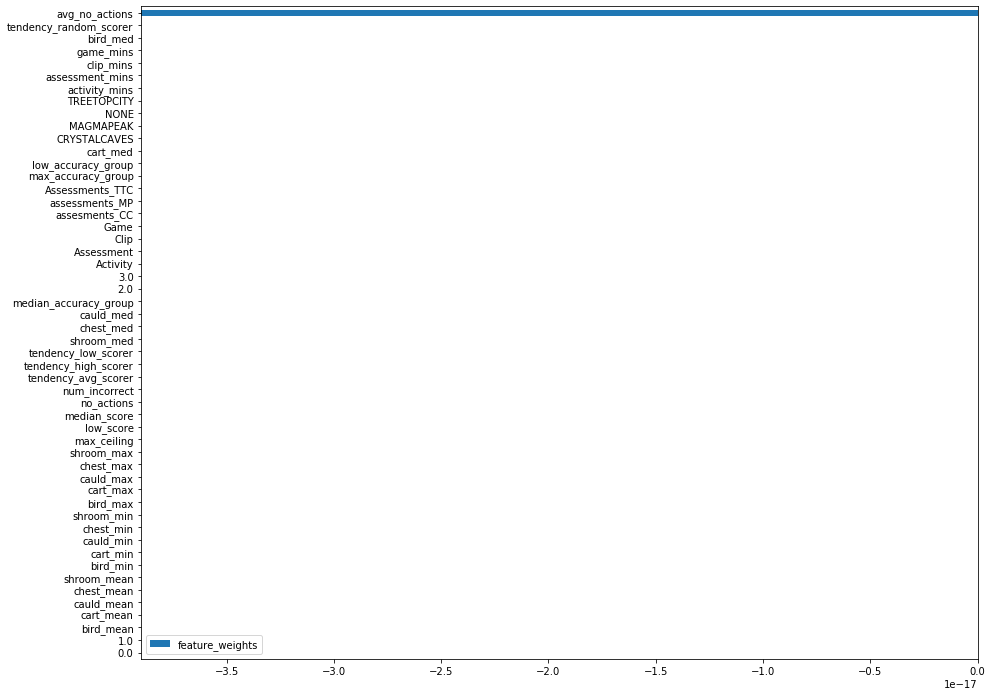

In [583]:
coef.plot(kind="barh",figsize=(15,12))

### Keep all non-zero features

In [584]:
weighted_coef = coef[coef.feature_weights != 0]

In [585]:
#see if all zero-value features are removed
weighted_coef.describe()

,feature_weights
count,1.000000e+00
mean,-3.901223e-17
std,NaN
min,-3.901223e-17
25%,-3.901223e-17
50%,-3.901223e-17
75%,-3.901223e-17
max,-3.901223e-17


In [586]:
weighted_coef_list = list(weighted_coef.index)

In [587]:
X_train.head()

,0.0,1.0,2.0,3.0,Activity,Assessment,Clip,Game,assesments_CC,assessments_MP,...,shroom_max,max_ceiling,low_score,median_score,no_actions,num_incorrect,tendency_avg_scorer,tendency_high_scorer,tendency_low_scorer,tendency_random_scorer
installation_id,,,,,,,,,,,,,,,,,,,,,
cc98145d,0.664978,-0.608822,0.447772,1.543975,0.924703,1.113900,0.028830,0.175483,0.592206,-0.043444,...,1.106151,0.484213,-0.811546,-0.811546,0.955907,0.955907,-0.376863,-0.666912,1.532359,-0.606796
972011af,-0.663624,0.359175,-0.626224,-0.933625,-0.481083,-0.854107,-0.823043,-0.578455,-0.887304,-0.043444,...,-1.004474,-1.601137,0.007823,0.007823,-0.440473,-0.440473,-0.376863,-0.666912,-0.652589,1.648002
47fc648c,-0.663624,-0.608822,0.447772,-0.107758,-0.179843,-0.362105,-0.098951,-0.201486,-0.887304,-0.043444,...,1.106151,0.484213,0.417507,0.417507,-0.591433,-0.591433,-0.376863,1.499448,-0.652589,-0.606796
2f322c2c,0.000677,-0.608822,-0.626224,-0.933625,-0.179843,-0.854107,-0.695262,-0.327142,-0.394134,-0.753757,...,-1.004474,-2.643811,-0.811546,-0.811546,-0.803721,-0.803721,-0.376863,-0.666912,1.532359,-0.606796
52cbb26b,0.000677,-0.608822,-0.626224,-0.933625,-0.380670,-0.854107,-0.524887,-0.327142,-0.394134,-0.753757,...,-1.004474,-2.643811,-0.811546,-0.811546,-0.822591,-0.822591,-0.376863,-0.666912,1.532359,-0.606796


In [588]:
X_train = X_train[weighted_coef_list]
X_test = X_test[weighted_coef_list]

In [589]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (686, 1)
X_test shape: (295, 1)


---
## VI. MODELING

### Random Forest

Create Random Forest object.  
Fit Train data.

In [590]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=600)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=600,
                       verbose=0, warm_start=False)

Look at how the algorithm use features, that is, check feature importance.

In [591]:
rf_features = pd.DataFrame([rf.feature_importances_],columns = X_train.columns).T.rename(columns = {0: 'feature_importance'}).sort_values(by='feature_importance', ascending=False)

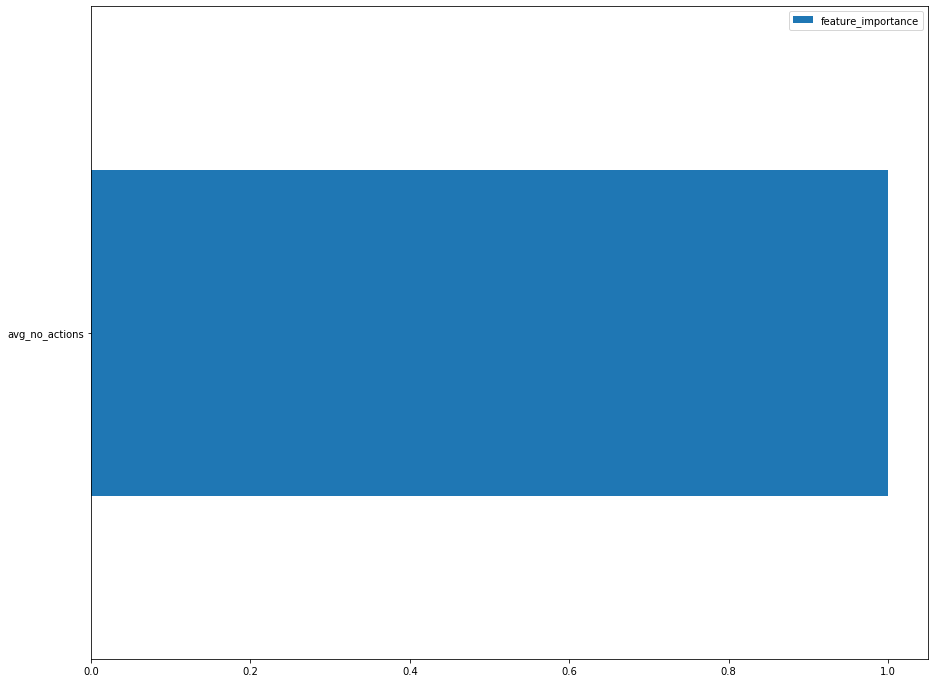

In [592]:
rf_features.plot(kind="barh",figsize=(15,12))

In [593]:
y_pred = pd.DataFrame(rf.predict(X_train),index = X_train.index)
y_pred_test = pd.DataFrame(rf.predict(X_test),index = X_test.index)

In [594]:
y_train.head()

,accuracy_group
installation_id,
e48333cc,3.0
d81d6844,0.0
ce4eb68c,1.0
345706ff,2.0
a0657480,1.0


In [595]:
predictions = y_train.copy().rename(columns={"accuracy_group":"actual_y"})
predictions[["predicted_y"]] = y_pred

In [596]:
predictions.head()

,actual_y,predicted_y
installation_id,,
e48333cc,3.0,1.0
d81d6844,0.0,2.0
ce4eb68c,1.0,3.0
345706ff,2.0,1.0
a0657480,1.0,NaN


#### EVALUATION: RANDOM FOREST

In [597]:
print(f"RF Score for Train: {rf.score(X_train, y_train)}")
print(f"RF Score for Test: {rf.score(X_test, y_test)}")

RF Score for Train: 0.5087463556851312
RF Score for Test: 0.22372881355932203


In [598]:
confusion_matrix(predictions.actual_y, predictions.predicted_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [599]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.14      0.12      0.13        68
         1.0       0.29      0.36      0.32        78
         2.0       0.22      0.25      0.23        77
         3.0       0.20      0.15      0.17        72

    accuracy                           0.22       295
   macro avg       0.21      0.22      0.21       295
weighted avg       0.21      0.22      0.22       295



### Logistic Regression

In [ ]:
logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')